## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [5]:
import os
import keras

# 請嘗試設定 GPU：os.environ


In [6]:
train, test = keras.datasets.cifar10.load_data()

In [7]:
# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [8]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x=(x - x.min()) / (x.max() - x.min()) -0.5
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [9]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:
x_test

array([[ 0.11960784, -0.06078431, -0.30784314, ..., -0.41764706,
        -0.2372549 , -0.06862745],
       [ 0.42156863,  0.42156863,  0.42156863, ...,  0.22941176,
         0.28431373,  0.28039216],
       [ 0.11960784,  0.24509804,  0.37058824, ..., -0.47254902,
        -0.46862745, -0.47254902],
       ...,
       [-0.42156863, -0.44117647, -0.45294118, ..., -0.40196078,
        -0.42156863, -0.31568627],
       [-0.40196078, -0.34313725, -0.45294118, ..., -0.13921569,
        -0.02941176, -0.18627451],
       [-0.21372549, -0.19411765, -0.20588235, ..., -0.39411765,
        -0.39803922, -0.39803922]])

In [11]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 128,128,128,128,128, 64]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer6 (Dense)        (None, 128)               1651

In [12]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [13]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [14]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 21s 415us/step - loss: 1.7641 - accuracy: 0.3595 - val_loss: 1.6064 - val_accuracy: 0.4293
Epoch 2/100
50000/50000 [==============================] - 18s 363us/step - loss: 1.5113 - accuracy: 0.4630 - val_loss: 1.4589 - val_accuracy: 0.4772
Epoch 3/100
50000/50000 [==============================] - 23s 458us/step - loss: 1.3942 - accuracy: 0.5076 - val_loss: 1.4197 - val_accuracy: 0.5015
Epoch 4/100
50000/50000 [==============================] - 24s 479us/step - loss: 1.2987 - accuracy: 0.5378 - val_loss: 1.3729 - val_accuracy: 0.5148
Epoch 5/100
50000/50000 [==============================] - 24s 472us/step - loss: 1.2148 - accuracy: 0.5705 - val_loss: 1.3839 - val_accuracy: 0.5144
Epoch 6/100
50000/50000 [==============================] - 24s 475us/step - loss: 1.1357 - accuracy: 0.5985 - val_loss: 1.3568 - val_accuracy: 0.5340
Epoch 7/100
50000/50000 [========================

50000/50000 [==============================] - 20s 398us/step - loss: 0.1137 - accuracy: 0.9620 - val_loss: 3.0265 - val_accuracy: 0.5295
Epoch 54/100
50000/50000 [==============================] - 20s 404us/step - loss: 0.1125 - accuracy: 0.9632 - val_loss: 2.9514 - val_accuracy: 0.5292
Epoch 55/100
50000/50000 [==============================] - 22s 444us/step - loss: 0.1098 - accuracy: 0.9634 - val_loss: 3.1521 - val_accuracy: 0.5327
Epoch 56/100
50000/50000 [==============================] - 21s 428us/step - loss: 0.1236 - accuracy: 0.9595 - val_loss: 2.9406 - val_accuracy: 0.5336
Epoch 57/100
50000/50000 [==============================] - 21s 414us/step - loss: 0.1067 - accuracy: 0.9652 - val_loss: 3.2096 - val_accuracy: 0.5222
Epoch 58/100
50000/50000 [==============================] - 24s 473us/step - loss: 0.1157 - accuracy: 0.9620 - val_loss: 3.0150 - val_accuracy: 0.5304
Epoch 59/100
50000/50000 [==============================] - 22s 435us/step - loss: 0.1037 - accuracy: 0.965

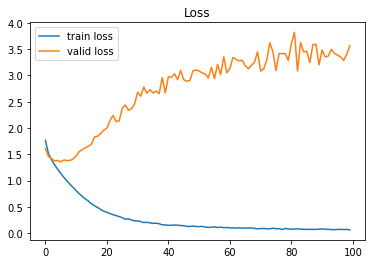

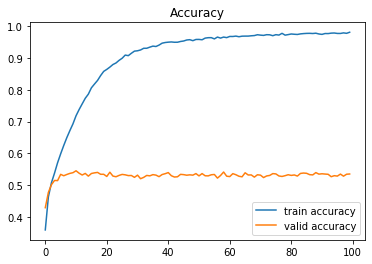

In [16]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()